Instalaciones

In [1]:
#!pip install xgboost

In [2]:
#!pip install lightgbm

In [3]:
#!conda config --add channels conda-forge
#!conda install catboost -y

In [4]:
#!pip install scikit-plot

## Clasificando voces humanas por género

descripcion

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('../data/100000/cv-valid-train_Bark_Bands_spectrum_pars.csv')

In [7]:
df.head()

,filename,text,up_votes,down_votes,age,gender,accent,duration,bb1,bb2,...,bb24,ok,pow,mfq,std,modafq,medianfq,IQR,Q1,Q3
0,cv-valid-train/sample-000000.mp3,learn to recognize omens and follow them the o...,1.0,0.0,NaN,NaN,NaN,NaN,0.002633,0.086439,...,0.000718,1.0,1.650145e-03,1213.752897,1388.294226,192.279502,738.578060,1100.415343,443.684339,1544.099682
1,cv-valid-train/sample-000001.mp3,everything in the universe evolved he said,1.0,0.0,NaN,NaN,NaN,NaN,0.001395,0.224020,...,0.000032,1.0,7.916365e-07,456.555733,379.835427,135.382170,437.673864,318.187839,249.966883,568.154722
2,cv-valid-train/sample-000002.mp3,you came so that you could learn about your dr...,1.0,0.0,NaN,NaN,NaN,NaN,0.000594,0.301720,...,0.000052,1.0,6.124250e-04,2557.028597,2663.549506,155.946962,504.056996,4553.334653,171.185434,4724.520087
3,cv-valid-train/sample-000003.mp3,so now i fear nothing because it was those ome...,1.0,0.0,NaN,NaN,NaN,NaN,0.000953,0.028043,...,0.000403,1.0,1.982778e-05,524.126760,819.548646,468.886545,451.559440,227.361760,253.879765,481.241525
4,cv-valid-train/sample-000004.mp3,if you start your emails with greetings let me...,3.0,2.0,NaN,NaN,NaN,NaN,0.000661,0.128622,...,0.000383,1.0,4.150297e-02,652.053861,1263.434945,213.101331,224.564995,249.744115,209.416581,459.160696


In [8]:
df = df[df['ok']==1]

In [9]:
df = df[~df['gender'].isna()]

In [10]:
df = df[~(df['gender']=='other')]


In [11]:
df = df.loc[:,['gender','bb1','bb2','bb3','bb4','bb5','bb6','bb7','bb8','bb9','bb10','bb11','bb12','bb13','bb14','bb15','bb16','bb17','bb18','bb19','bb20','bb21','bb22','bb23','bb24','pow']]

In [12]:
df.head(40)

,gender,bb1,bb2,bb3,bb4,bb5,bb6,bb7,bb8,bb9,...,bb16,bb17,bb18,bb19,bb20,bb21,bb22,bb23,bb24,pow
5,female,0.000164,0.346419,0.309572,0.112718,0.089885,0.026873,0.006768,0.010106,0.021302,...,0.009488,0.012083,0.017960,0.011980,0.007387,0.001722,2.251056e-06,3.980795e-07,4.578924e-07,0.000017
8,male,0.000256,0.010624,0.026257,0.072948,0.370282,0.088766,0.126652,0.009465,0.002699,...,0.009131,0.004340,0.003747,0.005449,0.002582,0.000606,2.635786e-04,7.335723e-05,1.371439e-05,0.000257
13,female,0.000013,0.012291,0.024824,0.073325,0.079520,0.086500,0.017077,0.083755,0.056664,...,0.017602,0.011059,0.005872,0.001481,0.000901,0.000068,4.168404e-07,8.351631e-09,7.498852e-08,0.000630
14,male,0.000255,0.136101,0.154552,0.116748,0.447025,0.064714,0.049373,0.014565,0.001376,...,0.000356,0.001287,0.000507,0.002618,0.001901,0.000794,1.556793e-04,2.188191e-05,2.538794e-06,0.000361
19,male,0.144352,0.260208,0.136039,0.134373,0.117953,0.062551,0.051448,0.019340,0.014022,...,0.000543,0.001736,0.002108,0.001501,0.005185,0.005998,5.531622e-03,3.793115e-03,8.228526e-04,0.000793
20,male,0.000121,0.026492,0.021798,0.029957,0.026305,0.029966,0.027395,0.019083,0.021616,...,0.013495,0.018566,0.059609,0.114471,0.097925,0.181942,1.336555e-01,8.910376e-02,1.241827e-02,0.002588
23,male,0.001232,0.027082,0.043156,0.040942,0.122492,0.345486,0.055621,0.033860,0.036756,...,0.011852,0.075292,0.007661,0.001774,0.011143,0.003722,6.692970e-06,5.501780e-08,6.693266e-08,0.002497
26,female,0.000612,0.160055,0.195700,0.059902,0.024315,0.101049,0.086644,0.026320,0.006948,...,0.029047,0.009506,0.003670,0.004804,0.023163,0.029298,2.803322e-02,6.210372e-03,1.521957e-03,0.003784
27,male,0.001098,0.048945,0.078252,0.139910,0.222739,0.229711,0.034739,0.015177,0.024850,...,0.029185,0.010427,0.001619,0.013908,0.003697,0.001467,7.152630e-04,1.426869e-03,5.790363e-04,0.002088
29,male,0.000161,0.047988,0.198414,0.185366,0.177054,0.273751,0.071023,0.007879,0.008246,...,0.000614,0.000345,0.001562,0.000664,0.000301,0.000336,3.377992e-04,1.611628e-04,1.401976e-04,0.001666


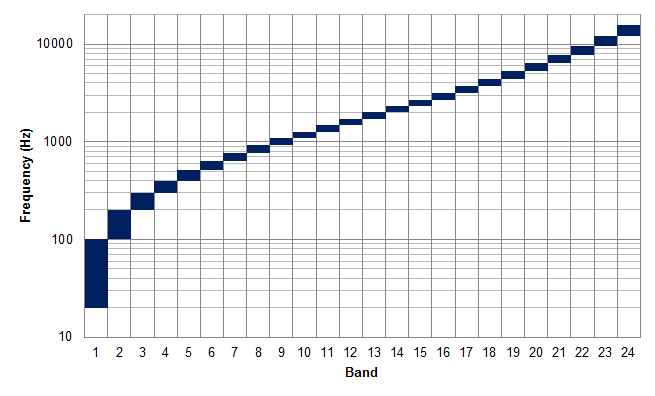

In [13]:
import warnings
warnings.filterwarnings("ignore")
import seaborn

C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


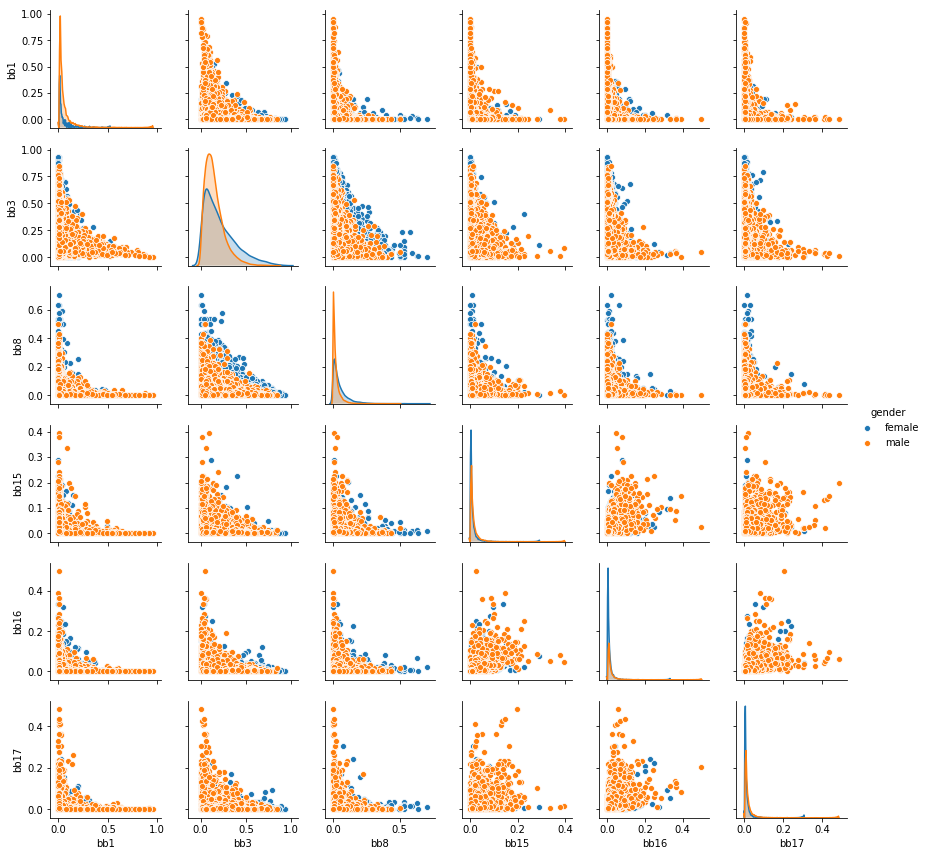

In [14]:
seaborn.pairplot(df[['gender','bb1','bb3','bb8','bb15','bb16','bb17']], 
                 hue='gender', height=2)

Transformamos la clase en 0 y 1 con LabelEncoder

In [15]:
y = df["gender"]
X = df.drop("gender", axis = 1)

In [16]:
print("el dataset tiene ", X.shape[0], " filas y ", X.shape[1], " columnas")

el dataset tiene  38902  filas y  25  columnas


In [17]:
from sklearn.preprocessing import LabelEncoder

Usamos LabelEncoder para transformar la clase en un array de 0 y 1

In [18]:
encoder = LabelEncoder()

In [19]:
y.head()

5     female
8       male
13    female
14      male
19      male
Name: gender, dtype: object

In [20]:
y.value_counts()

male      29188
female     9714
Name: gender, dtype: int64

In [21]:
y.unique()

array(['female', 'male'], dtype=object)

In [22]:
y = encoder.fit_transform(y)

In [23]:
y

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

Hagamos un split en train y test.

In [24]:
from sklearn.model_selection import train_test_split

Con la información de train vamos a realizar la búsqueda de hiperparámetros y ajustar el mejor modelo.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y)

## Knn - Benchmark

Comencemos probando Knn, que será nuestro benchmark

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import time
import numpy as np
from scikitplot.metrics import plot_roc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

In [27]:
model_knn = KNeighborsClassifier()

In [28]:
params = {"n_neighbors":list(range(3,8))}

In [29]:
knn = GridSearchCV(model_knn, params, verbose= True)

Imputamos los NA con 0

In [30]:
X_train_na = X_train.fillna(0)
X_test_na = X_test.fillna(0)

In [31]:
stds = StandardScaler()

In [32]:
X_train_knn = stds.fit_transform(X_train_na)

In [33]:
X_test_knn = stds.transform(X_test_na)

In [34]:
start = time.time()
knn.fit(X_train_knn, y_train)
end = time.time()
print("La búsqueda con knn llevó: ", end - start, " segundos")

Fitting 3 folds for each of 5 candidates, totalling 15 fits
La búsqueda con knn llevó:  357.4273314476013  segundos


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  6.0min finished


In [35]:
knn.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [36]:
y_predicted_knn = knn.predict_proba(X_test_knn)
knn_auc = roc_auc_score(y_test, y_predicted_knn[:,1])
print("El valor del AUC es: ", knn_auc)

El valor del AUC es:  0.8537017558776134


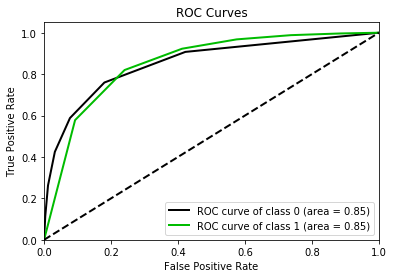

In [37]:
%matplotlib inline
plot_roc(y_test,y_predicted_knn, plot_micro = False, plot_macro= False);

## Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
model_rf = RandomForestClassifier()

In [40]:
import scipy.stats as st

A RandomizedSearchCV los hiperparámetros se los podemos pasar como una lista o también como una distribución de scipy.

In [41]:
params = {  
    "n_estimators": st.randint(20,40), # Number of boosted trees to fit.
    "max_depth": st.randint(3, 12)     # Maximum tree depth for base learners.
}

In [42]:
rf = RandomizedSearchCV(model_rf,params, n_iter=25, verbose= True)

In [43]:
start = time.time()
rf.fit(X_train_na,y_train)
end = time.time()
print("La búsqueda con Random Forest llevó: ", end - start, " segundos")

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  1.6min finished


La búsqueda con Random Forest llevó:  99.60945630073547  segundos


In [44]:
rf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=11, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=39, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
y_predicted_rf = rf.predict_proba(X_test_na)

In [46]:
rf_auc = roc_auc_score(y_test,y_predicted_rf[:,1])
print("El valor del AUC es: ", rf_auc)

El valor del AUC es:  0.9376752279469001


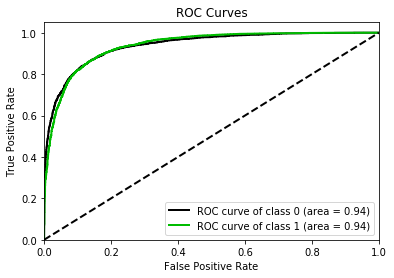

In [47]:
%matplotlib inline
plot_roc(y_test,y_predicted_rf, plot_micro = False, plot_macro= False);

## Xgboost

Vamos a importar el clasificador XGBoost del módulo xgboost.sklearn que nos provee clases y métodos aceptados por la API de sklearn. La clase que contiene este clasificador se llama XGBClassifier

In [48]:
from xgboost.sklearn import XGBClassifier

In [49]:
model_xg = XGBClassifier(n_jobs=-1)

Podemos partir del siguiente conjunto de hiperparámetros, que serán empleados también luego.

In [50]:
one_to_left = st.beta(10, 1) # Esta distribución nos dará valores entre 0 y 1 mayormente cercanos a 1

In [51]:
params = {  
    "n_estimators": st.randint(20,40), # Number of boosted trees to fit.
    "max_depth": st.randint(3, 12),     # Maximum tree depth for base learners.
    "learning_rate": st.uniform(0.05, 0.4), #     Boosting learning rate (xgb’s “eta”)
    "colsample_bytree": one_to_left, #     Subsample ratio of columns when constructing each tree.
    "subsample": one_to_left,     # Subsample ratio of the training instance.
    "gamma": st.uniform(0, 10), #     Minimum loss reduction required to make a further partition on a leaf node of the tree.
    'reg_alpha': st.uniform(0.05,10),   # L1 regularization term on weights
    "min_child_weight": st.uniform(1,20), #    Minimum sum of instance weight(hessian) needed in a child.
}

Se puede consultar los parámetros <a = "http://xgboost.readthedocs.io/en/latest/python/python_api.html"> aquí </a> y <a = "https://github.com/dmlc/xgboost/blob/master/doc/parameter.md"> aquí </a>

Realizamos la búsqueda de hiperparámetrosRandomiezSearchCV con 25 iteraciones

In [52]:
xgb = RandomizedSearchCV(model_xg,params, n_iter=25, verbose= True)

Busco el mejor set de hiperparámetros y calculamos el tiempo

¿Es necesario normalizar los features antes de aplicar XGBoost?

In [53]:
start = time.time()
xgb.fit(X_train,y_train)
end = time.time()
print("La búsqueda con XGBoost llevó: ", end - start, " segundos")

Fitting 3 folds for each of 25 candidates, totalling 75 fits


C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

La búsqueda con XGBoost llevó:  72.17738151550293  segundos


In [54]:
y_predicted_xgb = xgb.predict_proba(X_test)

In [55]:
y_predicted_xgb[:,0].shape

(9726,)

In [56]:
xgb_auc = roc_auc_score(y_test,y_predicted_xgb[:,1])
print("El valor del AUC es: ", xgb_auc)

El valor del AUC es:  0.9638534996899473


Graficamos la curva ROC por clase

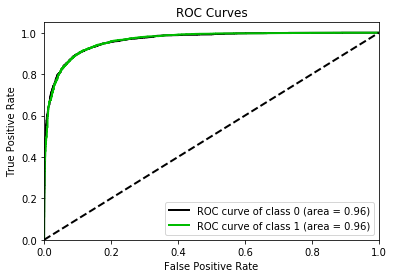

In [57]:
plot_roc(y_test,y_predicted_xgb, plot_micro = False, plot_macro= False);

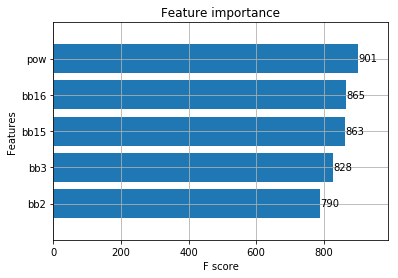

In [58]:
from xgboost import plot_importance
plot_importance(xgb.best_estimator_, height = 0.8,max_num_features=5);

Entonces, los principales atributos son:
- profit on operating activities / financial expenses
- (current assets - inventory) / short-term liabilities
- sales (n) / sales (n-1)
- operating expenses / total liabilities
- logarithm of total assets

También se pueden acceder los valores directamente con el atributo feature_importances_

In [59]:
print(xgb.best_estimator_.feature_importances_)

[0.04663277 0.04898921 0.05134565 0.04464839 0.03838522 0.03714499
 0.03354831 0.0462607  0.03423044 0.02939353 0.03286618 0.02970358
 0.03919137 0.03007565 0.05351606 0.05364008 0.04458638 0.03088181
 0.04402828 0.02585886 0.03088181 0.03695895 0.03633883 0.04502046
 0.0558725 ]


## LightGBM

La librería lightgbm permite directamente interactuar con SciKitLearn

In [60]:
import lightgbm as lgb

In [61]:
model_lgb = lgb.LGBMClassifier()

 Usamos los mismos rangos de hiperparámetros que para XGBoost. La lista completa de hiperparámetros se puede consultar <a = "https://github.com/Microsoft/LightGBM/blob/master/docs/Parameters.rst"> aquí </a>

¿Es necesario normalizar los features antes de aplicar LightGBM?

In [62]:
lgbm = RandomizedSearchCV(model_lgb, params, n_iter = 25, verbose= True)

In [63]:
start = time.time()
lgbm.fit(X_train, y_train)
end = time.time()
print("La búsqueda con LightGBM llevó: ", end - start, " segundos")

Fitting 3 folds for each of 25 candidates, totalling 75 fits


C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   12.4s finished


La búsqueda con LightGBM llevó:  12.70495867729187  segundos


In [64]:
print('Best parameters found by grid search are:', lgbm.best_params_)

Best parameters found by grid search are: {'colsample_bytree': 0.929998759065463, 'gamma': 1.297746390295036, 'learning_rate': 0.4296621604990945, 'max_depth': 7, 'min_child_weight': 6.766116564307495, 'n_estimators': 36, 'reg_alpha': 5.283157978011741, 'subsample': 0.8998933134191378}


In [65]:
y_predicted_lgbm = lgbm.predict_proba(X_test)

In [66]:
lgbm_auc = roc_auc_score(y_test,y_predicted_lgbm[:,1])
print("El valor del AUC es: ", lgbm_auc)

El valor del AUC es:  0.9565669114119606


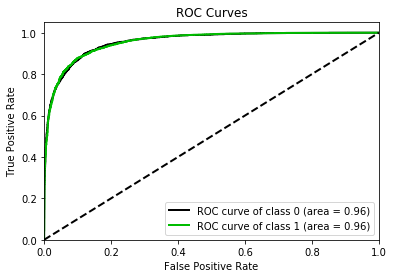

In [67]:
plot_roc(y_test,y_predicted_lgbm, plot_micro = False, plot_macro= False);

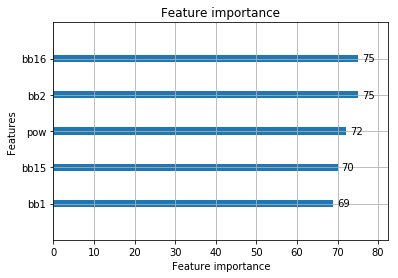

In [68]:
lgb.plot_importance(lgbm.best_estimator_, max_num_features=5);

In [69]:
lgbm.best_estimator_.feature_importances_

array([69, 75, 61, 43, 30, 37, 32, 44, 22, 22, 27, 21, 37, 31, 70, 75, 64,
       23, 48, 19, 34, 38, 37, 49, 72])

## CatBoost

In [70]:
from catboost import CatBoostClassifier

In [71]:
model_cat = CatBoostClassifier()

¿Es necesario normalizar los features antes de aplicar CatBoost?

Con CatBoost los resultados sin hacer una búsqueda de hiperparámetros ya son... ¡excelentes!

In [72]:
model_cat.fit(X_train, y_train)

0:	learn: 0.6673033	total: 206ms	remaining: 3m 26s
1:	learn: 0.6424790	total: 245ms	remaining: 2m 2s
2:	learn: 0.6214143	total: 283ms	remaining: 1m 34s
3:	learn: 0.6002612	total: 320ms	remaining: 1m 19s
4:	learn: 0.5829271	total: 357ms	remaining: 1m 11s
5:	learn: 0.5658755	total: 396ms	remaining: 1m 5s
6:	learn: 0.5515610	total: 435ms	remaining: 1m 1s
7:	learn: 0.5382504	total: 472ms	remaining: 58.5s
8:	learn: 0.5259086	total: 507ms	remaining: 55.8s
9:	learn: 0.5131726	total: 549ms	remaining: 54.3s
10:	learn: 0.5018400	total: 585ms	remaining: 52.6s
11:	learn: 0.4918276	total: 626ms	remaining: 51.5s
12:	learn: 0.4822900	total: 668ms	remaining: 50.7s
13:	learn: 0.4740745	total: 706ms	remaining: 49.7s
14:	learn: 0.4666212	total: 747ms	remaining: 49s
15:	learn: 0.4596741	total: 784ms	remaining: 48.2s
16:	learn: 0.4523864	total: 821ms	remaining: 47.5s
17:	learn: 0.4469308	total: 858ms	remaining: 46.8s
18:	learn: 0.4418324	total: 894ms	remaining: 46.1s
19:	learn: 0.4364126	total: 936ms	remai

165:	learn: 0.2673771	total: 6.42s	remaining: 32.3s
166:	learn: 0.2669626	total: 6.46s	remaining: 32.2s
167:	learn: 0.2664020	total: 6.49s	remaining: 32.2s
168:	learn: 0.2659694	total: 6.53s	remaining: 32.1s
169:	learn: 0.2654476	total: 6.57s	remaining: 32.1s
170:	learn: 0.2651031	total: 6.6s	remaining: 32s
171:	learn: 0.2648800	total: 6.64s	remaining: 32s
172:	learn: 0.2645270	total: 6.67s	remaining: 31.9s
173:	learn: 0.2641427	total: 6.71s	remaining: 31.9s
174:	learn: 0.2638365	total: 6.75s	remaining: 31.8s
175:	learn: 0.2635974	total: 6.79s	remaining: 31.8s
176:	learn: 0.2633046	total: 6.82s	remaining: 31.7s
177:	learn: 0.2628928	total: 6.86s	remaining: 31.7s
178:	learn: 0.2625692	total: 6.9s	remaining: 31.6s
179:	learn: 0.2623158	total: 6.93s	remaining: 31.6s
180:	learn: 0.2619089	total: 6.97s	remaining: 31.5s
181:	learn: 0.2615266	total: 7s	remaining: 31.5s
182:	learn: 0.2607949	total: 7.04s	remaining: 31.4s
183:	learn: 0.2604155	total: 7.08s	remaining: 31.4s
184:	learn: 0.2600486

324:	learn: 0.2223567	total: 12.4s	remaining: 25.7s
325:	learn: 0.2222047	total: 12.4s	remaining: 25.7s
326:	learn: 0.2220659	total: 12.5s	remaining: 25.7s
327:	learn: 0.2218693	total: 12.5s	remaining: 25.7s
328:	learn: 0.2217097	total: 12.6s	remaining: 25.6s
329:	learn: 0.2214283	total: 12.6s	remaining: 25.6s
330:	learn: 0.2213519	total: 12.6s	remaining: 25.6s
331:	learn: 0.2211586	total: 12.7s	remaining: 25.5s
332:	learn: 0.2209974	total: 12.7s	remaining: 25.5s
333:	learn: 0.2208075	total: 12.8s	remaining: 25.5s
334:	learn: 0.2205636	total: 12.8s	remaining: 25.4s
335:	learn: 0.2202793	total: 12.8s	remaining: 25.4s
336:	learn: 0.2200964	total: 12.9s	remaining: 25.3s
337:	learn: 0.2198822	total: 12.9s	remaining: 25.3s
338:	learn: 0.2195365	total: 13s	remaining: 25.3s
339:	learn: 0.2193988	total: 13s	remaining: 25.3s
340:	learn: 0.2192405	total: 13.1s	remaining: 25.2s
341:	learn: 0.2190456	total: 13.1s	remaining: 25.2s
342:	learn: 0.2188856	total: 13.1s	remaining: 25.2s
343:	learn: 0.21

486:	learn: 0.1970687	total: 18.8s	remaining: 19.8s
487:	learn: 0.1970186	total: 18.8s	remaining: 19.8s
488:	learn: 0.1969105	total: 18.9s	remaining: 19.7s
489:	learn: 0.1968148	total: 18.9s	remaining: 19.7s
490:	learn: 0.1967026	total: 18.9s	remaining: 19.6s
491:	learn: 0.1965967	total: 19s	remaining: 19.6s
492:	learn: 0.1964753	total: 19s	remaining: 19.6s
493:	learn: 0.1963566	total: 19.1s	remaining: 19.5s
494:	learn: 0.1960751	total: 19.1s	remaining: 19.5s
495:	learn: 0.1959724	total: 19.1s	remaining: 19.4s
496:	learn: 0.1958674	total: 19.2s	remaining: 19.4s
497:	learn: 0.1957664	total: 19.2s	remaining: 19.4s
498:	learn: 0.1955251	total: 19.3s	remaining: 19.3s
499:	learn: 0.1954152	total: 19.3s	remaining: 19.3s
500:	learn: 0.1953282	total: 19.3s	remaining: 19.3s
501:	learn: 0.1952012	total: 19.4s	remaining: 19.2s
502:	learn: 0.1951400	total: 19.4s	remaining: 19.2s
503:	learn: 0.1950784	total: 19.5s	remaining: 19.2s
504:	learn: 0.1950280	total: 19.5s	remaining: 19.1s
505:	learn: 0.19

645:	learn: 0.1817926	total: 24.8s	remaining: 13.6s
646:	learn: 0.1817443	total: 24.9s	remaining: 13.6s
647:	learn: 0.1816645	total: 24.9s	remaining: 13.5s
648:	learn: 0.1814554	total: 24.9s	remaining: 13.5s
649:	learn: 0.1812867	total: 25s	remaining: 13.5s
650:	learn: 0.1811957	total: 25s	remaining: 13.4s
651:	learn: 0.1810629	total: 25.1s	remaining: 13.4s
652:	learn: 0.1809772	total: 25.1s	remaining: 13.3s
653:	learn: 0.1808632	total: 25.1s	remaining: 13.3s
654:	learn: 0.1807587	total: 25.2s	remaining: 13.3s
655:	learn: 0.1806232	total: 25.2s	remaining: 13.2s
656:	learn: 0.1805213	total: 25.3s	remaining: 13.2s
657:	learn: 0.1804410	total: 25.3s	remaining: 13.1s
658:	learn: 0.1803297	total: 25.3s	remaining: 13.1s
659:	learn: 0.1802025	total: 25.4s	remaining: 13.1s
660:	learn: 0.1801747	total: 25.4s	remaining: 13s
661:	learn: 0.1801327	total: 25.4s	remaining: 13s
662:	learn: 0.1800675	total: 25.5s	remaining: 13s
663:	learn: 0.1799934	total: 25.5s	remaining: 12.9s
664:	learn: 0.1798878	

807:	learn: 0.1689824	total: 31.1s	remaining: 7.38s
808:	learn: 0.1689327	total: 31.1s	remaining: 7.34s
809:	learn: 0.1689037	total: 31.1s	remaining: 7.31s
810:	learn: 0.1688562	total: 31.2s	remaining: 7.27s
811:	learn: 0.1687365	total: 31.2s	remaining: 7.23s
812:	learn: 0.1687365	total: 31.2s	remaining: 7.19s
813:	learn: 0.1686986	total: 31.3s	remaining: 7.15s
814:	learn: 0.1686554	total: 31.3s	remaining: 7.11s
815:	learn: 0.1686418	total: 31.4s	remaining: 7.07s
816:	learn: 0.1685705	total: 31.4s	remaining: 7.03s
817:	learn: 0.1684571	total: 31.4s	remaining: 7s
818:	learn: 0.1683763	total: 31.5s	remaining: 6.96s
819:	learn: 0.1683125	total: 31.5s	remaining: 6.92s
820:	learn: 0.1683125	total: 31.5s	remaining: 6.88s
821:	learn: 0.1682534	total: 31.6s	remaining: 6.84s
822:	learn: 0.1682298	total: 31.6s	remaining: 6.8s
823:	learn: 0.1681464	total: 31.7s	remaining: 6.76s
824:	learn: 0.1680246	total: 31.7s	remaining: 6.72s
825:	learn: 0.1679749	total: 31.7s	remaining: 6.69s
826:	learn: 0.16

968:	learn: 0.1592170	total: 37.1s	remaining: 1.19s
969:	learn: 0.1591851	total: 37.1s	remaining: 1.15s
970:	learn: 0.1591611	total: 37.2s	remaining: 1.11s
971:	learn: 0.1591184	total: 37.2s	remaining: 1.07s
972:	learn: 0.1590067	total: 37.2s	remaining: 1.03s
973:	learn: 0.1588978	total: 37.3s	remaining: 995ms
974:	learn: 0.1588449	total: 37.3s	remaining: 957ms
975:	learn: 0.1588448	total: 37.3s	remaining: 918ms
976:	learn: 0.1587911	total: 37.4s	remaining: 880ms
977:	learn: 0.1587468	total: 37.4s	remaining: 842ms
978:	learn: 0.1586708	total: 37.5s	remaining: 804ms
979:	learn: 0.1586148	total: 37.5s	remaining: 765ms
980:	learn: 0.1585497	total: 37.5s	remaining: 727ms
981:	learn: 0.1584493	total: 37.6s	remaining: 689ms
982:	learn: 0.1584240	total: 37.6s	remaining: 651ms
983:	learn: 0.1584239	total: 37.6s	remaining: 612ms
984:	learn: 0.1583999	total: 37.7s	remaining: 574ms
985:	learn: 0.1583343	total: 37.7s	remaining: 536ms
986:	learn: 0.1582911	total: 37.8s	remaining: 497ms
987:	learn: 

In [73]:
y_predicted_cat = model_cat.predict_proba(X_test)

In [74]:
cat_auc = roc_auc_score(y_test,y_predicted_cat[:,1])
print("El valor del AUC es: ", cat_auc)

El valor del AUC es:  0.9657171721286341


La lista de hiperparámetros se puede consultar <a = "https://tech.yandex.com/catboost/doc/dg/concepts/python-reference_parameters-list-docpage/"> aquí </a>

## Conclusiones

In [75]:
print("Los resultados finales fueron:\n - AUC de knn:", knn_auc," \n - AUC de RF:", rf_auc, " \n - AUC de XGBoost:", xgb_auc,
     "\n - AUC de LightGBM:", lgbm_auc, "\n - AUC de CatBoost:", cat_auc)

Los resultados finales fueron:
 - AUC de knn: 0.8537017558776134  
 - AUC de RF: 0.9376752279469001  
 - AUC de XGBoost: 0.9638534996899473 
 - AUC de LightGBM: 0.9565669114119606 
 - AUC de CatBoost: 0.9657171721286341


# Matriz de confusión

In [76]:
y_predicted_cat_np = model_cat.predict(X_test)

In [77]:
y_predicted_cat_np

array([0., 1., 1., ..., 1., 1., 0.])

In [78]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [79]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted_cat_np, labels=None, sample_weight=None)

In [80]:
def product(*args, repeat=1):
    # product('ABCD', 'xy') --> Ax Ay Bx By Cx Cy Dx Dy
    # product(range(2), repeat=3) --> 000 001 010 011 100 101 110 111
    pools = [tuple(pool) for pool in args] * repeat
    result = [[]]
    for pool in pools:
        result = [x+[y] for x in result for y in pool]
    for prod in result:
        yield tuple(prod)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization
[[1926  503]
 [ 283 7014]]
Normalized confusion matrix
[[0.7929189  0.2070811 ]
 [0.03878306 0.96121694]]


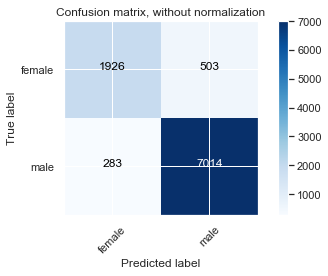

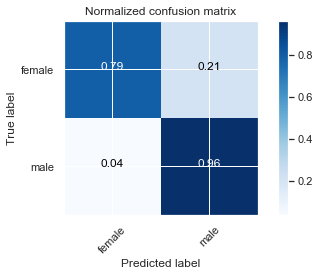

In [81]:
# Plot non-normalized confusion matrix
plt.figure()
class_names = ['female','male']
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()